# K-Means Clustering using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm K-Nearest Neighbors as a Classifier plus K-Means clustering algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy
from time import time

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [8]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

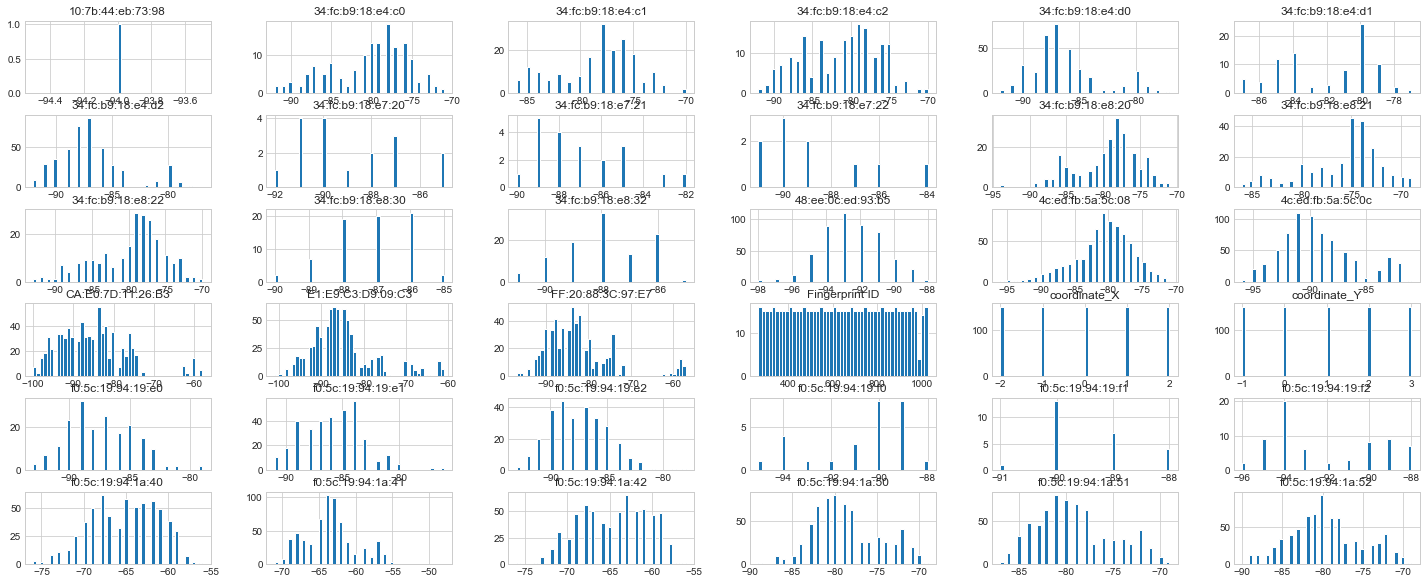

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

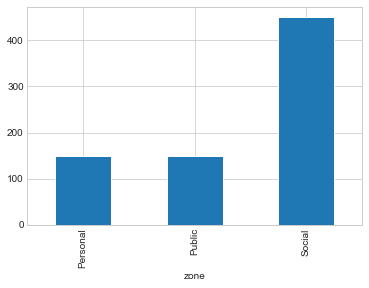

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

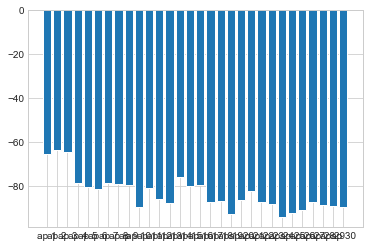

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

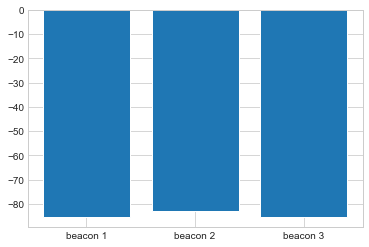

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

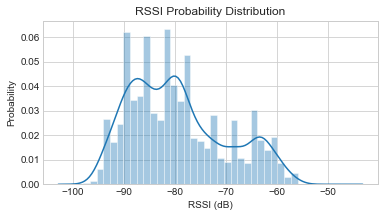

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

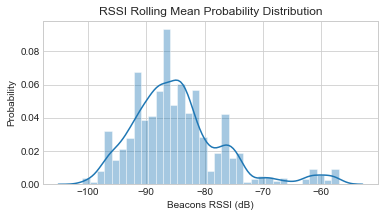

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [17]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
def compute_data_cleaning_with_global_minimum(dataset):
    numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
    dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [19]:
compute_data_cleaning_with_global_minimum(dataset)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


### Initialize Training Data
Training Data intialization for predictions purposes

In [20]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [21]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [22]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

### Plot Training Data
Graphical Display of the observations in the dataset

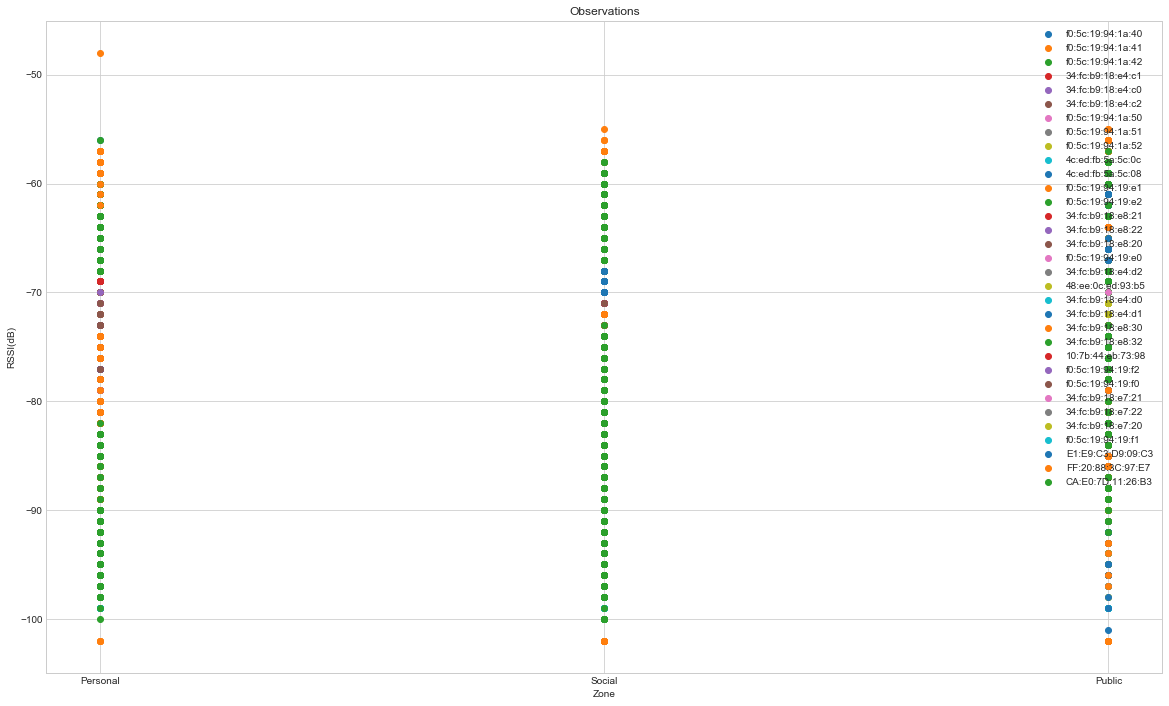

In [23]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [24]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [25]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [26]:
init_parameter = ["k-means++", "random"]
algorithms = ["auto","full","elkan"]
filters = ["Median","Mean","No Filter"]
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
precompute_distances = ["auto",True,False]

### Statistics Output Format
Structure of the statistical output of each call to the K-Means clustering algorithm

In [27]:
def structure_data(time_start,inertia,data,labels,estimator_labels):
    time_end = time() - time_start
    inertia = inertia
    homonegeity_score = metrics.homogeneity_score(labels,estimator_labels)
    completeness_score = metrics.completeness_score(labels,estimator_labels)
    v_measure = metrics.v_measure_score(labels,estimator_labels)
    rand_score = metrics.adjusted_rand_score(labels,estimator_labels)
    mis = metrics.mutual_info_score(labels,estimator_labels)
    statistical_results = [time_end,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis]
    return statistical_results

In [28]:
def structure_data_classifier(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.04325994, 0.04810747, 0.03314342, 0.00591601, 0.00370398,
       0.00507394, 0.04468166, 0.04005746, 0.04407035, 0.09729823,
       0.02612844, 0.07516993, 0.02724715, 0.0081502 , 0.00687554,
       0.00598436, 0.01278018, 0.01939051, 0.02235015, 0.03296903,
       0.00465692, 0.01818002, 0.03744815, 0.        , 0.04034581,
       0.00560249, 0.0012331 , 0.00068981, 0.00066361, 0.01199856,
       0.07174074, 0.05439229, 0.15069052])

CA:E0:7D:11:26:B3    0.150691
4c:ed:fb:5a:5c:0c    0.097298
f0:5c:19:94:19:e1    0.075170
E1:E9:C3:D9:09:C3    0.071741
FF:20:88:3C:97:E7    0.054392
f0:5c:19:94:1a:41    0.048107
f0:5c:19:94:1a:50    0.044682
f0:5c:19:94:1a:52    0.044070
f0:5c:19:94:1a:40    0.043260
f0:5c:19:94:19:f2    0.040346
f0:5c:19:94:1a:51    0.040057
34:fc:b9:18:e8:32    0.037448
f0:5c:19:94:1a:42    0.033143
34:fc:b9:18:e4:d0    0.032969
f0:5c:19:94:19:e2    0.027247
4c:ed:fb:5a:5c:08    0.026128
48:ee:0c:ed:93:b5    0.022350
34:fc:b9:18:e4:d2    0.019391
34:fc:b9:18:e8:30    0.018180
f0:5c:19:94:19:e0    0.012780
f0:5c:19:94:19:f1    0.011999
34:fc:b9:18:e8:21    0.008150
34:fc:b9:18:e8:22    0.006876
34:fc:b9:18:e8:20    0.005984
34:fc:b9:18:e4:c1    0.005916
f0:5c:19:94:19:f0    0.005602
34:fc:b9:18:e4:c2    0.005074
34:fc:b9:18:e4:d1    0.004657
34:fc:b9:18:e4:c0    0.003704
34:fc:b9:18:e7:21    0.001233
34:fc:b9:18:e7:22    0.000690
34:fc:b9:18:e7:20    0.000664
10:7b:44:eb:73:98    0.000000
dtype: flo

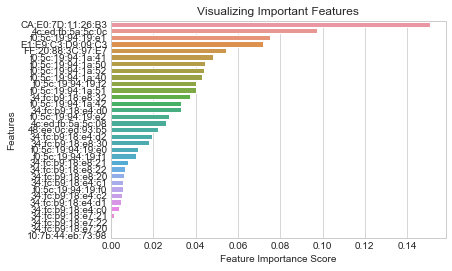

In [29]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - KNN Classification Model

In [30]:
def compute_KNN_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = None,
                                cross_validation = None,n_neighbors=5,
                                weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1):
    # Init the KNN Classification Estimator with the hyperparameters
    knn_classifier_estimator = KNeighborsClassifier(n_neighbors,weights,algorithm,leaf_size,p,metric,metric_params,n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_classifier_estimator)
    else:
        #Use SKLearnn KNN Classification Default Estimator
        main_estimator = knn_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        #Compute Classification performance details
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        #Compute Classification performance details
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': testY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data_classifier(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

### Model Training and Evaluation - K-Means Clustering Model

In [31]:
def compute_KMeans(flag= 0,trainX_data = None,train_Y=None,
                   n_clusters=4,init_parameter='k-means++',n_init=10,
                   algorithms='auto',scaler = None,precompute_distances='auto',n_jobs=-1):
    time_start = time()
    # Init the K-Means Clustering Estimator with the hyperparameters
    k_means_estimator = KMeans(n_clusters,init=init_parameter,n_init=n_init,random_state=42,precompute_distances=precompute_distances,n_jobs=n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,k_means_estimator)
    else:
        # Use SKLearn K-Means default estimator
        main_estimator = k_means_estimator
    # Fit and Predict the results of the training data features
    predicted = main_estimator.fit_predict(trainX_data)
    frame = trainX_data.copy()
    frame['cluster'] = predicted
    if flag == 1:
        display(frame)
        display(frame['cluster'].value_counts())
        display(frame['cluster'])
        display(confusion_matrix(frame['cluster'],train_Y))
        report = classification_report(frame['cluster'],train_Y,output_dict = True)
        statistics = pd.DataFrame(report).transpose()
        display(statistics)
        reduced_data = PCA(n_components=2).fit_transform(trainX_data)
        results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
        sns.scatterplot(x="pca1", y="pca2", hue=frame['cluster'], data=results)
        plt.title('K-means Clustering with 2 dimensions')
        plt.show()
    elif flag == 2:
        display(frame)
        display(frame['cluster'].value_counts())
        display(confusion_matrix(frame['cluster'],train_Y))
        report = classification_report(frame['cluster'],train_Y,output_dict = True)
        statistics = pd.DataFrame(report).transpose()
        display(statistics)
        reduced_data = PCA(n_components=2).fit_transform(trainX_data)
        results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
        sns.scatterplot(x="pca1", y="pca2", hue=frame['cluster'], data=results)
        plt.title('K-means Clustering with 2 dimensions')
        result = compute_KNN_with_Classifier(flag=0,testX_data=frame,testY_data=train_Y,scaler=StandardScaler(),cross_validation = 10,
                            metric = 'canberra',weights='distance',algorithm='brute')
        statistical_results = [result]
        return result
    elif flag == 3:
        display(frame)
        display(frame['cluster'].value_counts())
        display(confusion_matrix(frame['cluster'],train_Y))
        report = classification_report(frame['cluster'],train_Y,output_dict = True)
        statistics = pd.DataFrame(report).transpose()
        display(statistics)
        reduced_data = PCA(n_components=2).fit_transform(trainX_data)
        results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
        sns.scatterplot(x="pca1", y="pca2", hue=frame['cluster'], data=results)
        plt.title('K-means Clustering with 2 dimensions')
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_KNN_with_Classifier(flag=1,n_neighbors=3,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),metric = 'canberra',weights='distance',algorithm='brute')
        statistical_results = [result]
        return result
    return structure_data(time_start,k_means_estimator.inertia_,trainX_data,train_Y,k_means_estimator.labels_)

### Experiments

#### Check Training model
Use K-Means to check the results on the training data alone

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,3
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,3
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,3
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,3


2    313
0    209
1    201
3     27
Name: cluster, dtype: int64

0      2
1      2
2      1
3      2
4      2
      ..
745    3
746    3
747    3
748    3
749    3
Name: cluster, Length: 750, dtype: int32

array([[ 31,  45, 133,   0],
       [ 27,  21, 153,   0],
       [ 65,  84, 164,   0],
       [ 27,   0,   0,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.206667,0.148325,0.172702,209.000
1,0.140000,0.104478,0.119658,201.000
2,0.364444,0.523962,0.429882,313.000
3,0.000000,0.000000,0.000000,27.000
accuracy,0.288000,0.288000,0.288000,0.288
macro avg,0.177778,0.194191,0.180561,750.000
weighted avg,0.247206,0.288000,0.259599,750.000


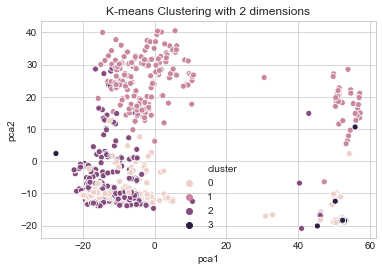

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-86.0,-88.0,-96,1
1,-96.0,-88.0,-96,1
2,-94.0,-92.0,-98,1
3,-92.0,-89.0,-96,1
4,-96.0,-89.0,-93,1
...,...,...,...,...
745,-95.0,-84.0,-95,1
746,-94.0,-83.0,-92,1
747,-92.0,-84.0,-91,1
748,-93.0,-84.0,-93,1


1    404
3    184
2     88
0     74
Name: cluster, dtype: int64

0      1
1      1
2      1
3      1
4      1
      ..
745    1
746    1
747    1
748    1
749    1
Name: cluster, Length: 750, dtype: int32

array([[  0,  32,  42,   0],
       [146,   6, 252,   0],
       [  0,  59,  29,   0],
       [  4,  53, 127,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,74.000000
1,0.040000,0.014851,0.021661,404.000000
2,0.064444,0.329545,0.107807,88.000000
3,0.000000,0.000000,0.000000,184.000000
accuracy,0.046667,0.046667,0.046667,0.046667
macro avg,0.026111,0.086099,0.032367,750.000000
weighted avg,0.029108,0.046667,0.024317,750.000000


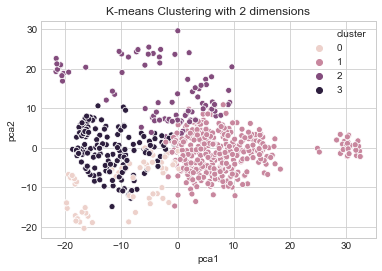

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96,0
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96,0
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96,0
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95,2
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92,2
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91,2
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93,2


0    402
1    222
3     99
2     27
Name: cluster, dtype: int64

0      0
1      0
2      1
3      0
4      0
      ..
745    2
746    2
747    2
748    2
749    2
Name: cluster, Length: 750, dtype: int32

array([[ 72, 115, 215,   0],
       [ 34,   7, 181,   0],
       [ 27,   0,   0,   0],
       [ 17,  28,  54,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.480000,0.179104,0.260870,402.000000
1,0.046667,0.031532,0.037634,222.000000
2,0.000000,0.000000,0.000000,27.000000
3,0.000000,0.000000,0.000000,99.000000
accuracy,0.105333,0.105333,0.105333,0.105333
macro avg,0.131667,0.052659,0.074626,750.000000
weighted avg,0.271093,0.105333,0.150966,750.000000


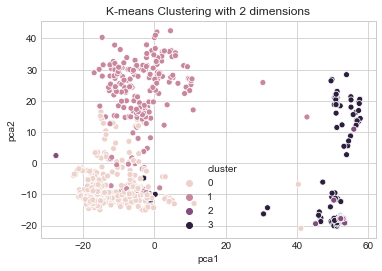

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,type
1,0.681654,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,BLE
2,0.656233,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,Both
0,3.812641,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,WiFi


In [32]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_KMeans(flag=1,scaler=StandardScaler(),trainX_data = trainX_data,train_Y=train_Y.ravel())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))

#### Experiment - Finding the best k parameter with Elbow Method

In [33]:
def elbow_search():
    types = ['WiFi','BLE','Both']
    results = list()
    for feature in types:
        print("FEATURE " + str(feature))
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train
        innertia_values = {}
        distortions = []
        for i in range(1, 11):
            km = KMeans(
                n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, random_state=42
            )
            km.fit(trainX_data)
            distortions.append(km.inertia_)
            innertia_values[i] = km.inertia_
        # plot
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()
        display(innertia_values)

FEATURE WiFi


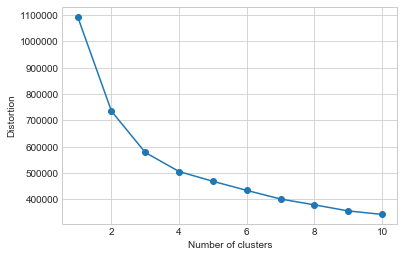

{1: 1093931.2532128002,
 2: 734999.6388506952,
 3: 578045.8256337275,
 4: 505563.75279556314,
 5: 468620.43610288046,
 6: 434085.0658508848,
 7: 401131.5194313584,
 8: 379156.51659202203,
 9: 356065.686602961,
 10: 342726.34419607127}

FEATURE BLE


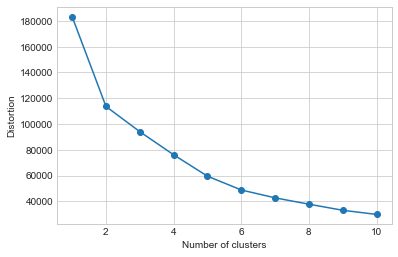

{1: 183213.62457813334,
 2: 113644.05250014993,
 3: 94095.83713736595,
 4: 76174.78199040242,
 5: 59594.3440202603,
 6: 48893.67507617105,
 7: 42781.21538904033,
 8: 37856.90235054745,
 9: 33145.1225946602,
 10: 29930.582534817964}

FEATURE Both


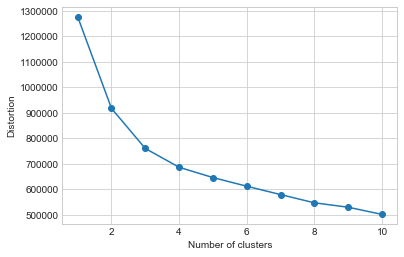

{1: 1277144.877790934,
 2: 917247.6582873403,
 3: 759977.4018991487,
 4: 686123.6534732135,
 5: 645686.4931844798,
 6: 611714.4522822299,
 7: 578878.6482793908,
 8: 546567.3445826151,
 9: 529270.8426148712,
 10: 501017.5634892591}

In [34]:
best_k = elbow_search()

#### Experiment - Running the K-Means function with the different init_parameters

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,init_parameter,type
2,0.051970,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,BLE
3,0.051968,946.507403,0.258641,0.182632,0.214090,0.101942,0.245779,random,BLE
5,0.068960,18518.901979,0.134720,0.114297,0.123671,0.060557,0.128020,random,Both
4,0.063963,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,k-means++,Both
1,0.059966,16344.461973,0.123934,0.105322,0.113873,0.057122,0.117771,random,WiFi
0,0.051969,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,k-means++,WiFi


Selected Init Parameter:  k-means++


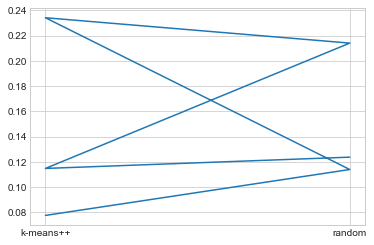

In [35]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','init_parameter','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for param in init_parameter:
        result = compute_KMeans(scaler=StandardScaler(),init_parameter=param,trainX_data=trainX_data,train_Y=train_Y.ravel())
        result.append(param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))
plt.plot(statistics['init_parameter'],statistics['v_measure'])
selected_init_param = statistics.sort_values(by=['v_measure'],ascending=False)['init_parameter'].head(1).values[0]
print("Selected Init Parameter: ",selected_init_param)

#### Experiment - Running the K-Means function with the different preprocessing

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,preprocessing,preprocessingFunc,type
4,0.043975,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
6,0.048971,7.418066,0.249035,0.190479,0.215856,0.126299,0.236651,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
5,0.048971,41.575333,0.196211,0.142302,0.164964,0.067349,0.186454,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
7,0.055969,76174.781990,0.174649,0.137535,0.153885,0.084338,0.165963,None,None,BLE
8,0.058967,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
0,0.060965,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
9,0.049971,1034.973306,0.043467,0.033488,0.037830,0.012268,0.041306,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
1,0.060964,938.106472,0.043182,0.033137,0.037498,0.012116,0.041035,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
10,0.046973,69.153474,0.041968,0.031231,0.035812,0.015723,0.039881,MaxAbsScaler,MaxAbsScaler(copy=True),Both
11,0.044974,686123.653473,0.041968,0.031231,0.035812,0.015723,0.039881,None,None,Both


Selected Preprocessing:  StandardScaler


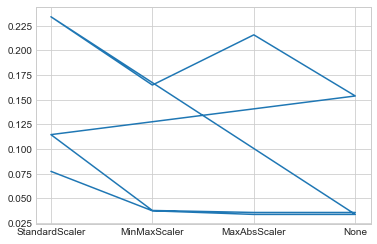

In [36]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for preprocess in scaler:
        result = compute_KMeans(scaler = preprocess,trainX_data = trainX_data,train_Y = train_Y.ravel())
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))
plt.plot(statistics['preprocessing'],statistics['v_measure'])
selected_preprocessing = statistics.sort_values(by=['v_measure'],ascending=False)['preprocessing'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the KMeans function with the different algorithms

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,algorithm,type
3,0.063963,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,auto,BLE
4,0.052496,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,full,BLE
5,0.048970,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,elkan,BLE
6,0.044975,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,auto,Both
7,0.061964,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,full,Both
8,0.046974,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,elkan,Both
0,0.044976,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,auto,WiFi
1,0.047970,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,full,WiFi
2,0.044974,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,elkan,WiFi


Selected Algorithm:  auto


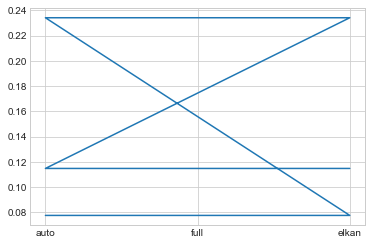

In [37]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for algorithm in algorithms:
        result = compute_KMeans(scaler = StandardScaler(),algorithms=algorithm,trainX_data = trainX_data,train_Y = train_Y.ravel())
        result.append(algorithm)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))
plt.plot(statistics['algorithm'],statistics['v_measure'])
selected_algorithm = statistics.sort_values(by=['v_measure'],ascending=False)['algorithm'].head(1).values[0]
print("Selected Algorithm: ",selected_algorithm)

#### Experiment - Running the KMeans function with the different preprocessing distance values

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,distance,distanceStr,type
3,0.065956,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,auto,auto,BLE
4,0.040976,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,True,True,BLE
5,0.038980,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,False,False,BLE
6,0.043973,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,auto,auto,Both
7,0.044976,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,True,True,Both
8,0.049972,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,False,False,Both
0,0.051969,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,auto,auto,WiFi
1,0.057966,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,True,True,WiFi
2,0.054969,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,False,False,WiFi


Selected Distance:  auto


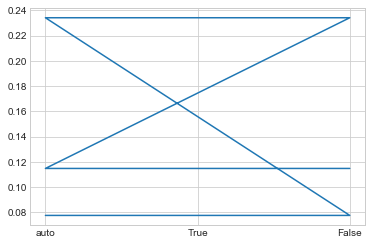

In [38]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','distance','distanceStr','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for distance in precompute_distances:
        result = compute_KMeans(scaler = StandardScaler(),precompute_distances=distance,trainX_data = trainX_data,train_Y = train_Y.ravel())
        result.append(distance)
        result.append(str(distance))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))
plt.plot(statistics['distanceStr'],statistics['v_measure'])
selected_distance = statistics.sort_values(by=['v_measure'],ascending=False)['distanceStr'].head(1).values[0]
print("Selected Distance: ",selected_distance)

#### Experiment - Run with every configurable parameters and let the program decide the best parameters
Match these with the previously settled.

In [39]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','init_parameter','preprocessing','algorithm','distance','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    k_range = range(1, 31)
    for param in init_parameter:
        for preprocessing in scaler:
            for algorithm in algorithms:
                for distance in precompute_distances:
                    result = compute_KMeans(scaler=preprocessing,init_parameter=param,algorithms=algorithm,precompute_distances=distance,
                                           trainX_data = trainX_data,train_Y = train_Y.ravel())
                    if(preprocess is None):
                        regex = 'None'
                    else:
                        regex = re.search('(\w+)\(',str(preprocess)).group(1)
                    result.append(param)
                    result.append(regex)
                    result.append(algorithm)
                    result.append(distance)
                    result.append(feature)
                    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure'],ascending=False))

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,init_parameter,preprocessing,algorithm,distance,type
75,0.046731,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,None,full,auto,BLE
72,0.046975,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,None,auto,auto,BLE
73,0.045973,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,None,auto,True,BLE
74,0.043974,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,None,auto,False,BLE
76,0.038089,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,k-means++,None,full,True,BLE
...,...,...,...,...,...,...,...,...,...,...,...,...
30,0.044972,505563.752796,0.039674,0.029492,0.033833,0.013576,0.037701,k-means++,None,full,auto,WiFi
31,0.041977,505563.752796,0.039674,0.029492,0.033833,0.013576,0.037701,k-means++,None,full,True,WiFi
32,0.045981,505563.752796,0.039674,0.029492,0.033833,0.013576,0.037701,k-means++,None,full,False,WiFi
33,0.052971,505563.752796,0.039674,0.029492,0.033833,0.013576,0.037701,k-means++,None,elkan,auto,WiFi


### Best Parameters

In [40]:
conclusion_cols=['K Parameter','Init Parameter','Algorithnm','Preprocessing','Preprocessing Distance']
conclusion_list = [4,selected_init_param,selected_algorithm,selected_preprocessing,selected_distance]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,K Parameter,Init Parameter,Algorithnm,Preprocessing,Preprocessing Distance
0,4,k-means++,auto,StandardScaler,auto


### Best Result

In [41]:
statistical_cols = ['time','inertia','homonegeity_score','completeness_score','v_measure','rand_score','mis','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    result = compute_KMeans(n_clusters=4,init_parameter=selected_init_param,scaler=StandardScaler(),
                            precompute_distances=selected_distance,algorithms=selected_algorithm,trainX_data=trainX_data,train_Y=train_Y.ravel())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['v_measure']))

,time,inertia,homonegeity_score,completeness_score,v_measure,rand_score,mis,type
0,0.046973,16412.353515,0.087386,0.069588,0.077478,0.025685,0.083041,WiFi
2,0.072959,18474.767852,0.122645,0.107755,0.114719,0.041227,0.116546,Both
1,0.058967,945.820245,0.259778,0.213195,0.234192,0.133193,0.246859,BLE


#### Clustering + Classification - No cross validation

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,3
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,3
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,3
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,3


2    313
0    209
1    201
3     27
Name: cluster, dtype: int64

array([[ 31,  45, 133,   0],
       [ 27,  21, 153,   0],
       [ 65,  84, 164,   0],
       [ 27,   0,   0,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.206667,0.148325,0.172702,209.000
1,0.140000,0.104478,0.119658,201.000
2,0.364444,0.523962,0.429882,313.000
3,0.000000,0.000000,0.000000,27.000
accuracy,0.288000,0.288000,0.288000,0.288
macro avg,0.177778,0.194191,0.180561,750.000
weighted avg,0.247206,0.288000,0.259599,750.000


,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-86.0,-88.0,-96,1
1,-96.0,-88.0,-96,1
2,-94.0,-92.0,-98,1
3,-92.0,-89.0,-96,1
4,-96.0,-89.0,-93,1
...,...,...,...,...
745,-95.0,-84.0,-95,1
746,-94.0,-83.0,-92,1
747,-92.0,-84.0,-91,1
748,-93.0,-84.0,-93,1


1    404
3    184
2     88
0     74
Name: cluster, dtype: int64

array([[  0,  32,  42,   0],
       [146,   6, 252,   0],
       [  0,  59,  29,   0],
       [  4,  53, 127,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,74.000000
1,0.040000,0.014851,0.021661,404.000000
2,0.064444,0.329545,0.107807,88.000000
3,0.000000,0.000000,0.000000,184.000000
accuracy,0.046667,0.046667,0.046667,0.046667
macro avg,0.026111,0.086099,0.032367,750.000000
weighted avg,0.029108,0.046667,0.024317,750.000000


,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96,0
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96,0
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96,0
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95,2
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92,2
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91,2
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93,2


0    402
1    222
3     99
2     27
Name: cluster, dtype: int64

array([[ 72, 115, 215,   0],
       [ 34,   7, 181,   0],
       [ 27,   0,   0,   0],
       [ 17,  28,  54,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.480000,0.179104,0.260870,402.000000
1,0.046667,0.031532,0.037634,222.000000
2,0.000000,0.000000,0.000000,27.000000
3,0.000000,0.000000,0.000000,99.000000
accuracy,0.105333,0.105333,0.105333,0.105333
macro avg,0.131667,0.052659,0.074626,750.000000
weighted avg,0.271093,0.105333,0.150966,750.000000


,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.182667,0.182667,0.427395,0.800403,0.817333,0.813675,Both
0,0.220000,0.220000,0.469042,0.763188,0.780000,0.774816,WiFi
1,0.341333,0.341333,0.584237,0.632178,0.658667,0.638324,BLE


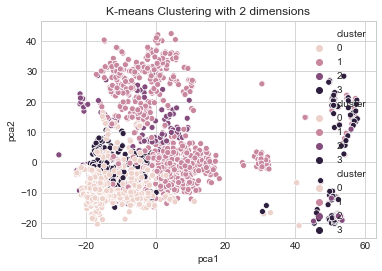

In [42]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    result = compute_KMeans(flag=2,n_clusters=4,init_parameter=selected_init_param,scaler=StandardScaler(),
                            precompute_distances=selected_distance,algorithms=selected_algorithm,trainX_data=trainX_data,
                           train_Y = train_Y.ravel())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

### Clustering + Classification - Train/test Split Validation

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,3
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,3
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,3
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,3


2    313
0    209
1    201
3     27
Name: cluster, dtype: int64

array([[ 31,  45, 133,   0],
       [ 27,  21, 153,   0],
       [ 65,  84, 164,   0],
       [ 27,   0,   0,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.206667,0.148325,0.172702,209.000
1,0.140000,0.104478,0.119658,201.000
2,0.364444,0.523962,0.429882,313.000
3,0.000000,0.000000,0.000000,27.000
accuracy,0.288000,0.288000,0.288000,0.288
macro avg,0.177778,0.194191,0.180561,750.000
weighted avg,0.247206,0.288000,0.259599,750.000


Confusion Matrix:
[[ 38   0   7]
 [  0  40   5]
 [  2   3 130]]


,precision,recall,f1-score,support
0,0.950000,0.844444,0.894118,45.000000
1,0.930233,0.888889,0.909091,45.000000
2,0.915493,0.962963,0.938628,135.000000
accuracy,0.924444,0.924444,0.924444,0.924444
macro avg,0.931909,0.898765,0.913946,225.000000
weighted avg,0.925342,0.924444,0.923819,225.000000


,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
220,1,1
221,1,1
222,1,2
223,2,2


,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-86.0,-88.0,-96,1
1,-96.0,-88.0,-96,1
2,-94.0,-92.0,-98,1
3,-92.0,-89.0,-96,1
4,-96.0,-89.0,-93,1
...,...,...,...,...
745,-95.0,-84.0,-95,1
746,-94.0,-83.0,-92,1
747,-92.0,-84.0,-91,1
748,-93.0,-84.0,-93,1


1    404
3    184
2     88
0     74
Name: cluster, dtype: int64

array([[  0,  32,  42,   0],
       [146,   6, 252,   0],
       [  0,  59,  29,   0],
       [  4,  53, 127,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,74.000000
1,0.040000,0.014851,0.021661,404.000000
2,0.064444,0.329545,0.107807,88.000000
3,0.000000,0.000000,0.000000,184.000000
accuracy,0.046667,0.046667,0.046667,0.046667
macro avg,0.026111,0.086099,0.032367,750.000000
weighted avg,0.029108,0.046667,0.024317,750.000000


Confusion Matrix:
[[ 29   0  16]
 [  0  31  14]
 [ 19   9 107]]


,precision,recall,f1-score,support
0,0.604167,0.644444,0.623656,45.000000
1,0.775000,0.688889,0.729412,45.000000
2,0.781022,0.792593,0.786765,135.000000
accuracy,0.742222,0.742222,0.742222,0.742222
macro avg,0.720063,0.708642,0.713277,225.000000
weighted avg,0.744446,0.742222,0.742672,225.000000


,Actual,Predicted
0,2,2
1,2,2
2,0,2
3,2,2
4,2,2
...,...,...
220,1,1
221,1,2
222,1,1
223,2,0


,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,cluster
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96,0
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96,0
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98,1
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96,0
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95,2
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92,2
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91,2
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93,2


0    402
1    222
3     99
2     27
Name: cluster, dtype: int64

array([[ 72, 115, 215,   0],
       [ 34,   7, 181,   0],
       [ 27,   0,   0,   0],
       [ 17,  28,  54,   0]], dtype=int64)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.480000,0.179104,0.260870,402.000000
1,0.046667,0.031532,0.037634,222.000000
2,0.000000,0.000000,0.000000,27.000000
3,0.000000,0.000000,0.000000,99.000000
accuracy,0.105333,0.105333,0.105333,0.105333
macro avg,0.131667,0.052659,0.074626,750.000000
weighted avg,0.271093,0.105333,0.150966,750.000000


Confusion Matrix:
[[ 44   0   1]
 [  0  41   4]
 [  1   2 132]]


,precision,recall,f1-score,support
0,0.977778,0.977778,0.977778,45.000000
1,0.953488,0.911111,0.931818,45.000000
2,0.963504,0.977778,0.970588,135.000000
accuracy,0.964444,0.964444,0.964444,0.964444
macro avg,0.964923,0.955556,0.960061,225.000000
weighted avg,0.964355,0.964444,0.964272,225.000000


,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
220,1,1
221,1,1
222,1,1
223,2,2


,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.035556,0.035556,0.188562,0.964749,0.964444,0.961494,Both
0,0.075556,0.075556,0.274874,0.929570,0.924444,0.917341,WiFi
1,0.257778,0.257778,0.507718,0.727820,0.742222,0.723001,BLE


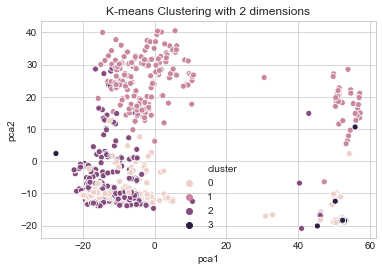

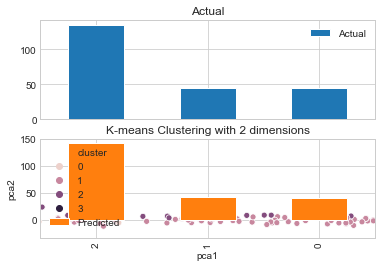

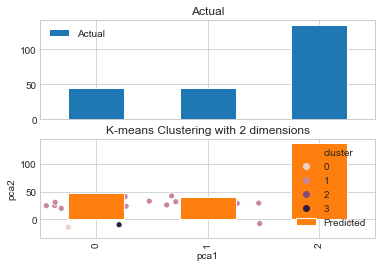

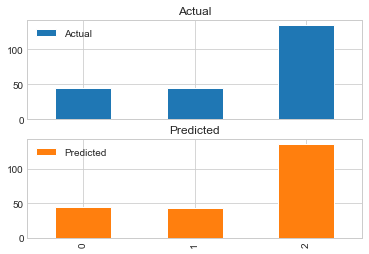

In [43]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    result = compute_KMeans(flag=3,n_clusters=4,init_parameter=selected_init_param,scaler=StandardScaler(),
                            precompute_distances=selected_distance,algorithms=selected_algorithm,trainX_data=trainX_data,
                           train_Y = train_Y.ravel())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))